<img src="https://logos-download.com/wp-content/uploads/2016/12/National_University_of_Singapore_logo_NUS.png" style="float: left; margin: 20px; height: 55px">

# Hypothesis Testing

In [24]:
# Importing NumPy and Pandas.
import numpy as np
import pandas as pd

# Importing matplotlib.pyplot - the specific plotting API 
# https://matplotlib.org/api/pyplot_api.html
import matplotlib.pyplot as plt

# Import Seaborn.
import seaborn as sns

from statistics import mean


# Function for Biased Die

In [25]:
def biased_die(n, p):
    count = 0        
    for i in range(n): 
        
        while True:    
            die_throw = np.random.choice(['success','others'],
                                         p = [p, 1 - p])
            
            if die_throw == 'success': 
                    count += 1    
            break               
                     
    return (count / n)*100

# Probability of Fair Die

In [26]:
(1/6)*100

16.666666666666664

# n Independent Trials

In [27]:
biased_die(10, 0.5)

20.0

In [28]:
# np.random.seed(6)
biased_die(1000, 0.66)

67.10000000000001

In [29]:
biased_die(10000, 0.66)

65.95

# N experiments of n trials each

In [30]:
n = 1000 # n is the number of trial in each experiment

In [31]:
p = 0.5 # p is the determined probability of success

In [32]:
trial_list = []
for i in range(100):
    np.random.seed(i)
    x = biased_die(n, p)
    trial_list.append(x)

In [33]:
trial_list[:10]

[51.7, 49.4, 53.400000000000006, 48.8, 48.1, 50.2, 49.7, 51.2, 49.0, 49.0]

In [34]:
trial_df = pd.DataFrame(trial_list)

In [35]:
print(type(trial_df))

<class 'pandas.core.frame.DataFrame'>


In [36]:
trial_df.rename({0:'% Success'}, axis=1, inplace=True)
trial_df.head()

,% Success
0,51.7
1,49.4
2,53.4
3,48.8
4,48.1


## Average % Success of 100 Experiments

In [37]:
trial_mean = trial_df['% Success'].mean()
trial_mean

50.327000000000005

# Experimental Outcomes Plot

Text(0, 0.5, '% Success')

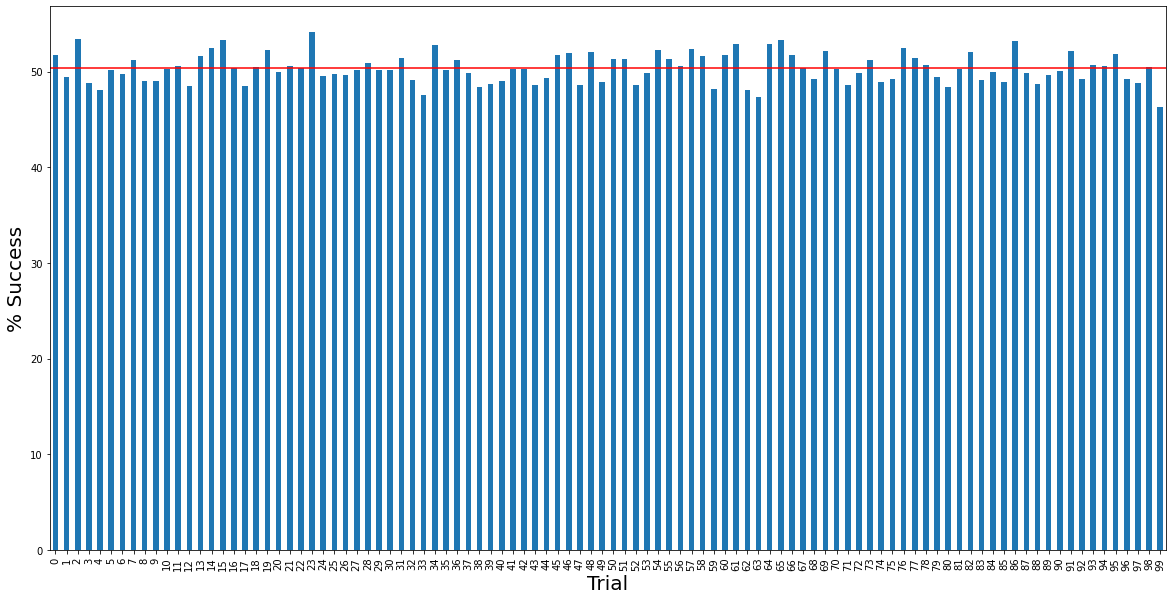

In [38]:
plt.figure(figsize=(20, 10))
trial_df['% Success'].plot(kind='bar')
plt.axhline(y = trial_df['% Success'].mean(), color = 'r', linestyle = '-')
plt.xlabel('Trial', fontsize=20)
plt.ylabel('% Success',fontsize=20)
# plt.axes.get_xaxis().set_visible(False)


# P-Value

Out of 100 Trials of 1000 Die-Tosses, the average rate of 6 facing up is 80.16%

In [39]:
actual_mean = (n*trial_mean)/100
actual_mean

503.2700000000001

Use Probability given Null Hypothesis is True

$X-Binom(1000, 1/6)$

Calculate probability of the event and more extreme cases. Ie 3306 times out of 10000 where 6 will appear face up. And also more than 3306.

$P(X=800)+P(X=801)+ .... + P(X=999) + P(X=1000)$

In [40]:
import scipy.stats as stats

In [41]:
null_probability = 1/6

In [42]:
stats.binom(n=n, p=null_probability).pmf(actual_mean)

0.0

In [46]:
prob = 0 
for i in range(500,1000):
        prob += stats.binom(n=n, p=null_probability).pmf(i)
prob

7.280563002199038e-130

In [44]:
stats.binom(n=n, p=null_probability).cdf(actual_mean)

1.0

In [47]:
p_value = 1 - stats.binom(n=n, p=null_probability).cdf(actual_mean)
p_value = round(p_value, 10)
p_value

0.0

In [49]:
round(1-prob,10)

1.0

p-value is zero